## Comparison Plots

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Catplot (Categorical Plot)

In [3]:
cars = sns.load_dataset('mpg').dropna()

In [5]:
cars = cars[cars.cylinders.isin([4,6,8])]

In [6]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [8]:
cars['type'] = ['old' if x <= 76 else 'new' for x in cars.model_year]

In [9]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,type
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,old
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,old
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,old
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,old
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,old


In [10]:
cars.shape

(385, 10)

In [11]:
sns.set_style('white')

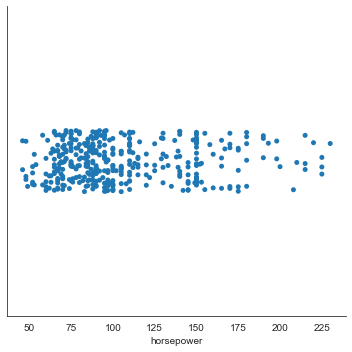

In [12]:
sns.catplot(x='horsepower', data=cars);
# the default catplot is a stripplot

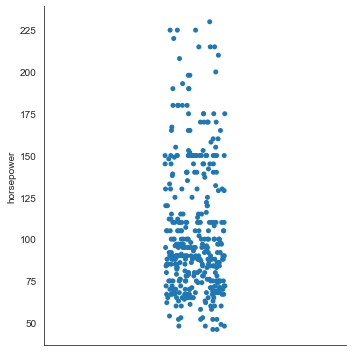

In [13]:
sns.catplot(y='horsepower', data=cars);

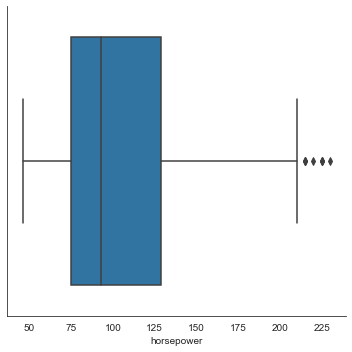

In [14]:
sns.catplot(x='horsepower', data=cars, kind='box');

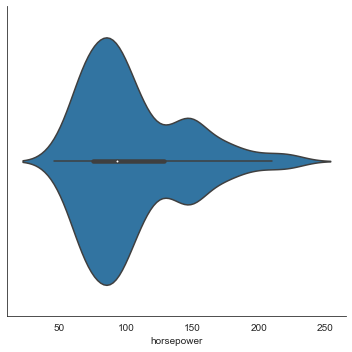

In [15]:
sns.catplot(x='horsepower', data=cars, kind='violin');

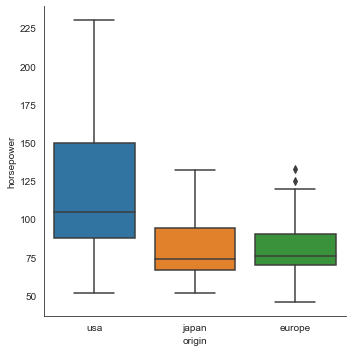

In [16]:
sns.catplot(x='origin', y='horsepower', data=cars, kind='box');

In [17]:
sns.set_style('darkgrid')

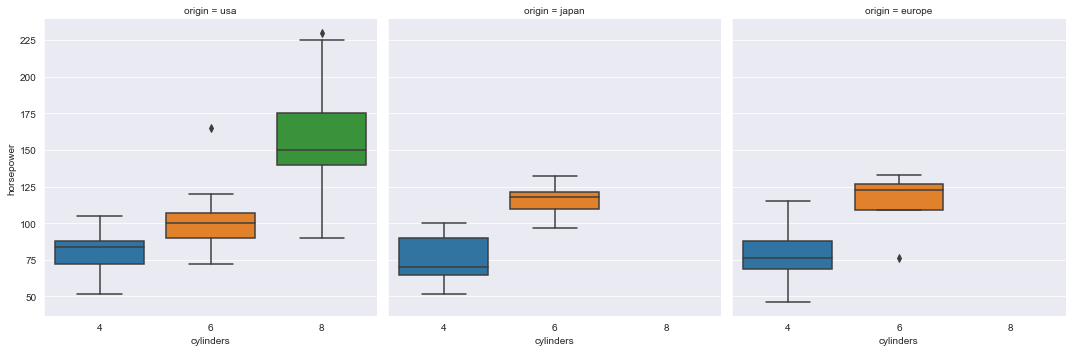

In [19]:
sns.catplot(x='cylinders', y='horsepower', data=cars, kind='box', col='origin');

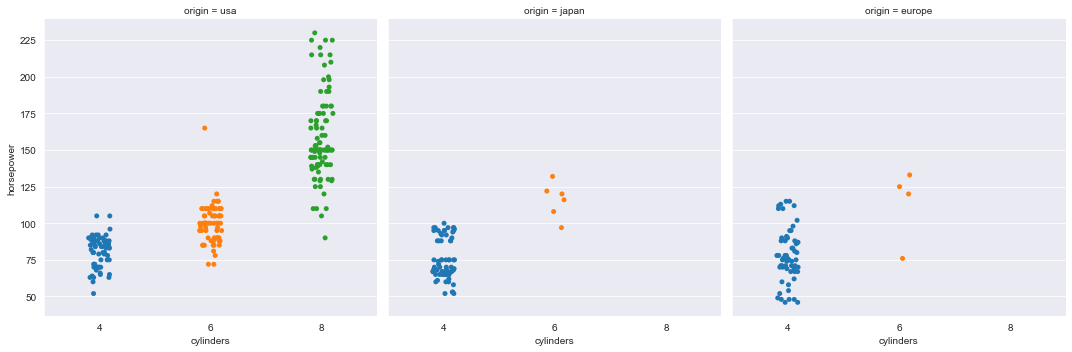

In [22]:
sns.catplot(x='cylinders', y='horsepower', data=cars, kind='strip', col='origin');

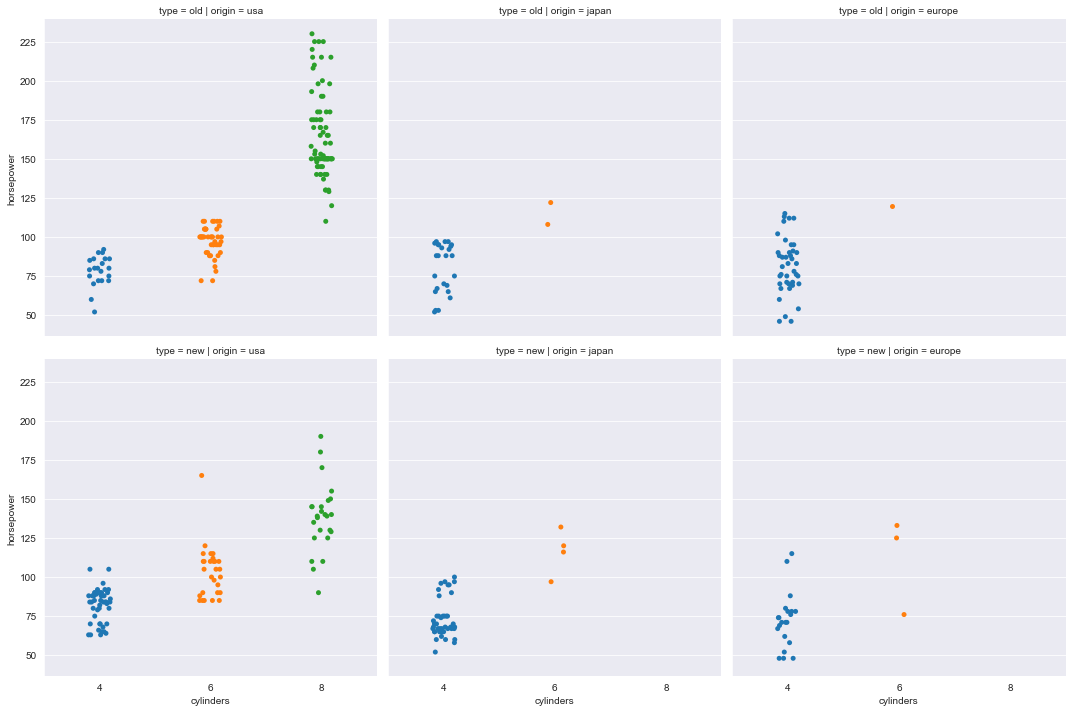

In [23]:
sns.catplot(x='cylinders', y='horsepower', data=cars, kind='strip', col='origin', row='type');

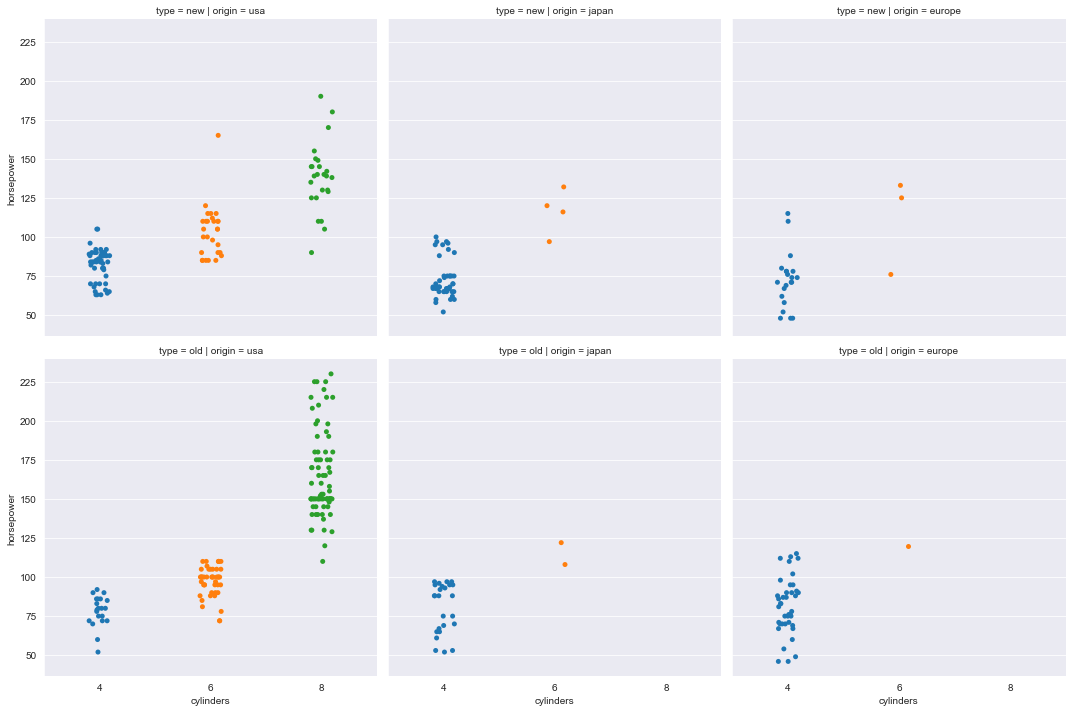

In [24]:
sns.catplot(x='cylinders', y='horsepower', data=cars, kind='strip', col='origin', row='type', 
            row_order=['new', 'old']);

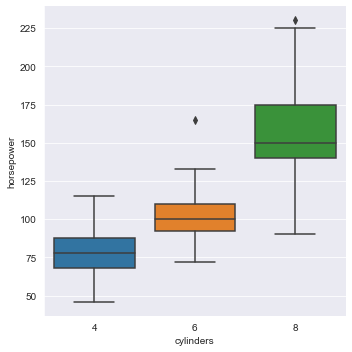

In [25]:
g = sns.catplot(x='cylinders', y='horsepower', data=cars, kind='box');

# kind olarak neyi sectiysek onunla ilgili styling parametrelerini kullanabilirim. Mesela burada whis gibi

In [26]:
type(g)

seaborn.axisgrid.FacetGrid

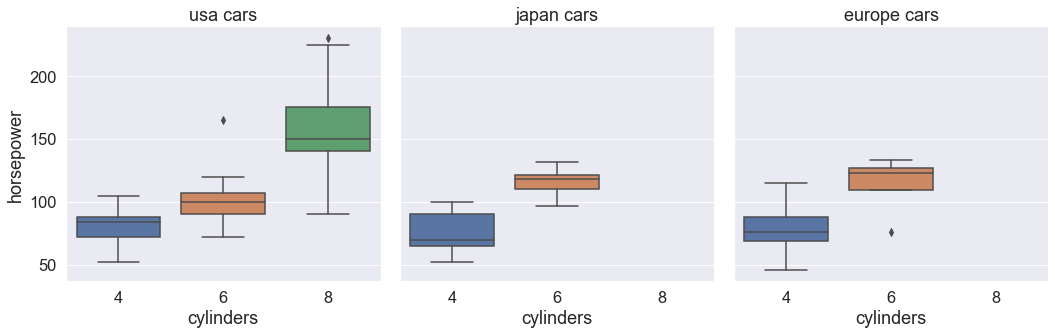

In [30]:
sns.set(style='darkgrid', font_scale=1.5)

g = sns.catplot(x='cylinders', y='horsepower', data=cars, kind='box', col='origin')

g.set_titles(col_template='{col_name} cars');

### Jointplot

In [31]:
geyser=sns.load_dataset('geyser')

In [32]:
geyser.head()

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long


In [33]:
geyser.shape

(272, 3)

In [55]:
sns.set(style='darkgrid', font_scale=1)

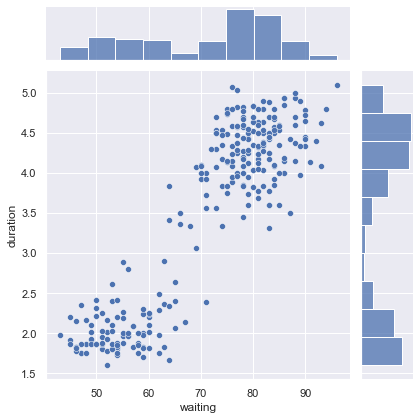

In [56]:
sns.jointplot(x='waiting', y='duration', data=geyser);

In [57]:
# There are currently six kinds of jointplots allowed in seaborn:
# scatter (default), kde, reg, hist, hex, and resid

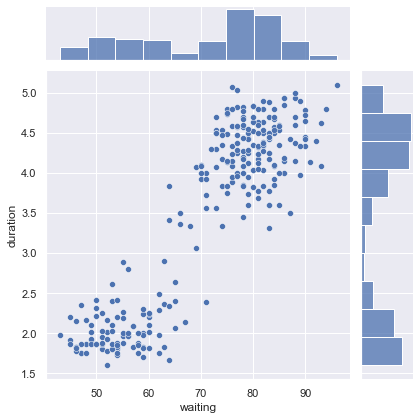

In [58]:
sns.jointplot(x='waiting', y='duration', data=geyser, kind='scatter');

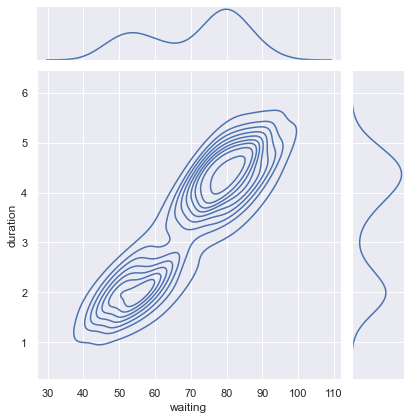

In [59]:
sns.jointplot(x='waiting', y='duration', data=geyser, kind='kde');

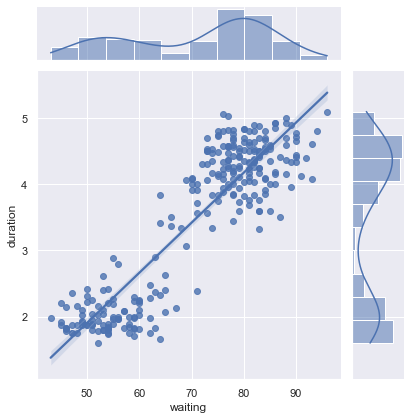

In [60]:
sns.jointplot(x='waiting', y='duration', data=geyser, kind='reg');

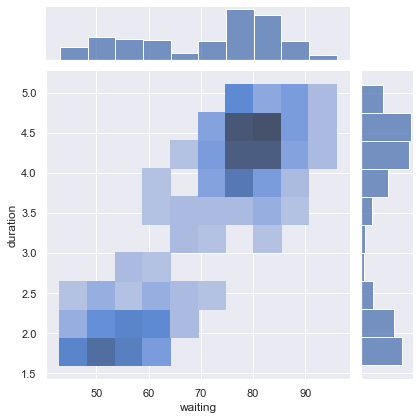

In [61]:
sns.jointplot(x='waiting', y='duration', data=geyser, kind='hist');

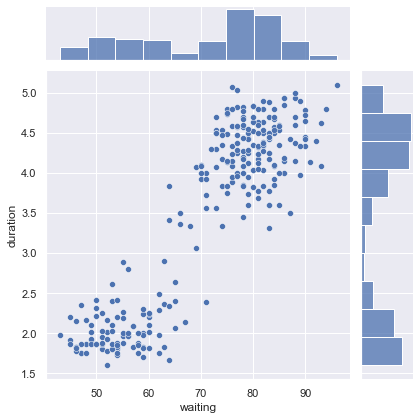

In [62]:
g = sns.jointplot(x='waiting', y='duration', data=geyser);

In [63]:
type(g)

seaborn.axisgrid.JointGrid

In [64]:
g.plot_joint(sns.kdeplot, color='gray', levels=5);

In [65]:
geyser.head()

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long


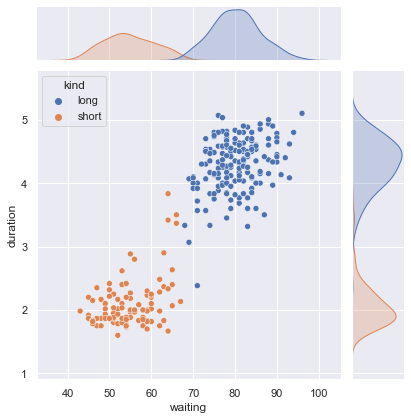

In [68]:
sns.jointplot(x='waiting', y='duration', data=geyser, hue='kind');

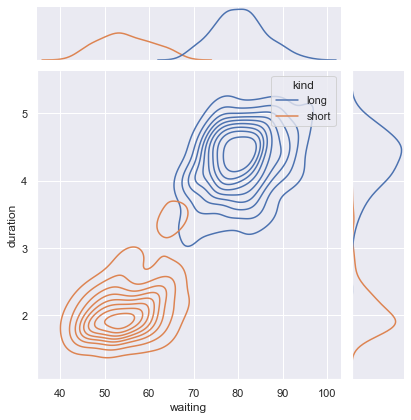

In [69]:
sns.jointplot(x='waiting', y='duration', data=geyser, hue='kind', kind='kde');

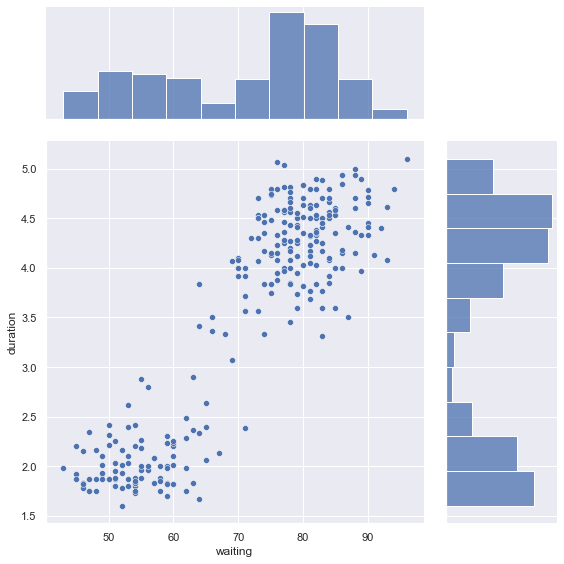

In [72]:
sns.jointplot(x='waiting', y='duration', data=geyser, height=8, space=0.2, ratio=3);

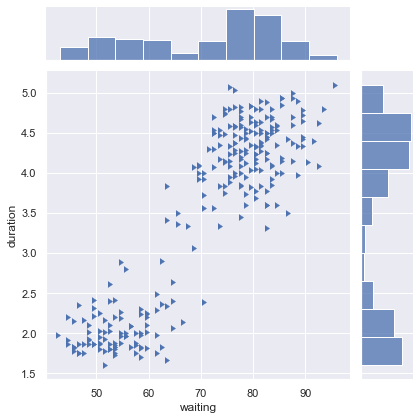

In [73]:
sns.jointplot(x='waiting', y='duration', data=geyser, joint_kws={'marker': 5});
# burada joint_kws joint kisimda hangi turde bir plot varsa onun kws'larina uygun olmali

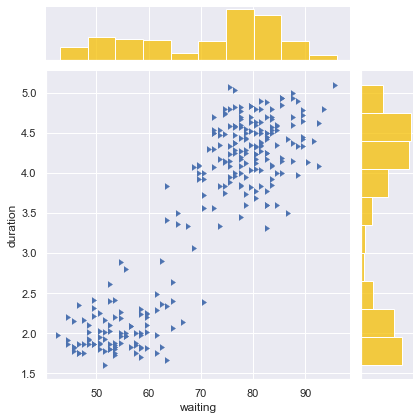

In [75]:
sns.jointplot(x='waiting', y='duration', data=geyser, joint_kws={'marker': 5},
             marginal_kws={'color': 'xkcd:golden'});

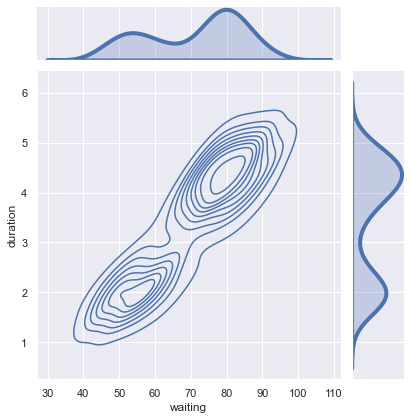

In [76]:
sns.jointplot(x='waiting', y='duration', data=geyser, kind='kde',
             marginal_kws={'lw': 4, 'shade': True});

### Pairplot

In [77]:
tips = sns.load_dataset('tips')

In [78]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


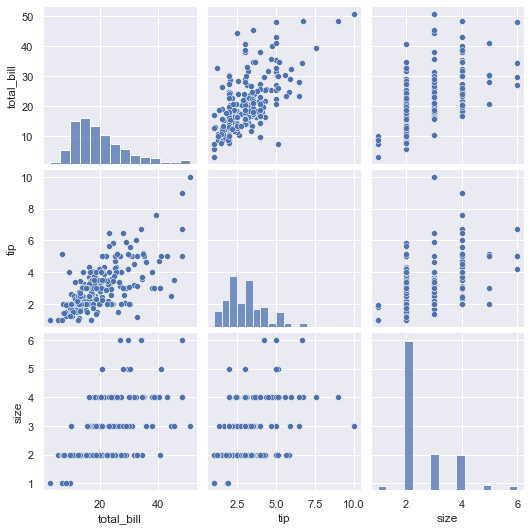

In [79]:
sns.pairplot(tips);

# ticks'ler sadece relational olan plot'lar icin bir anlam ifade ediyor.
# ornegin histogramlar icin bir anlam ifade etmiyor

In [80]:
tips.dtypes
# seaborn buradaki numeric degiskenleri algilayip bu degiskenler uzerinden plot'lama islemini yapiyor

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

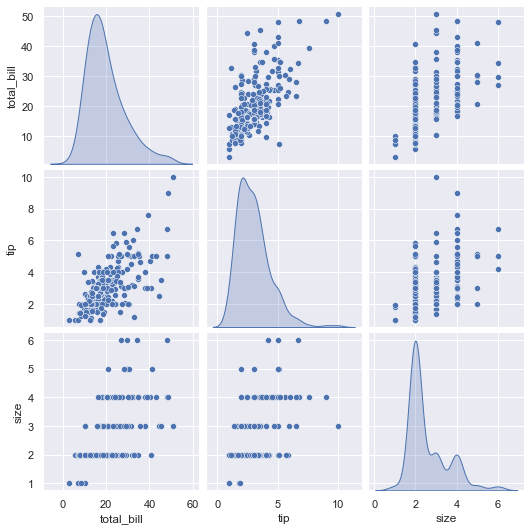

In [82]:
sns.pairplot(tips, diag_kind='kde');
# default olarak diagonal'larda histogram varken off-diagonal'lerde scatter plot bulunuyor.

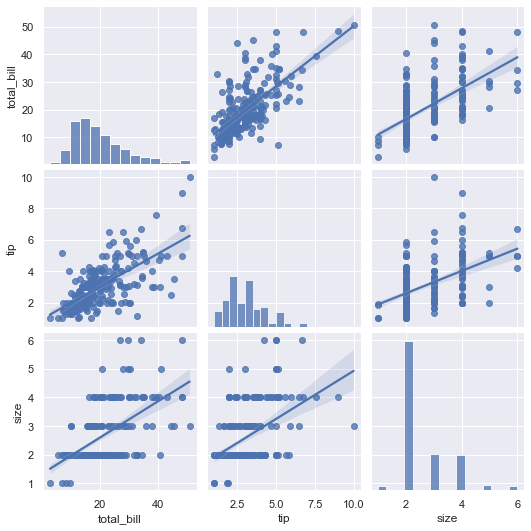

In [83]:
sns.pairplot(tips, kind='reg');
# off-diagonal plot'lari da kind parametresi ile belirleyebiliyoruz.

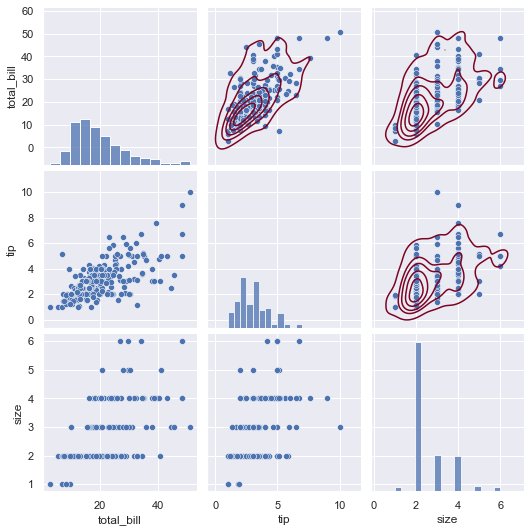

In [84]:
g = sns.pairplot(tips)
g.map_upper(sns.kdeplot, n_levels=6, color='xkcd:wine red');

In [85]:
tips['weekend'] = tips.day.isin(['Sat', 'Sun'])

In [86]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,weekend
0,16.99,1.01,Female,No,Sun,Dinner,2,True
1,10.34,1.66,Male,No,Sun,Dinner,3,True
2,21.01,3.50,Male,No,Sun,Dinner,3,True
3,23.68,3.31,Male,No,Sun,Dinner,2,True
4,24.59,3.61,Female,No,Sun,Dinner,4,True


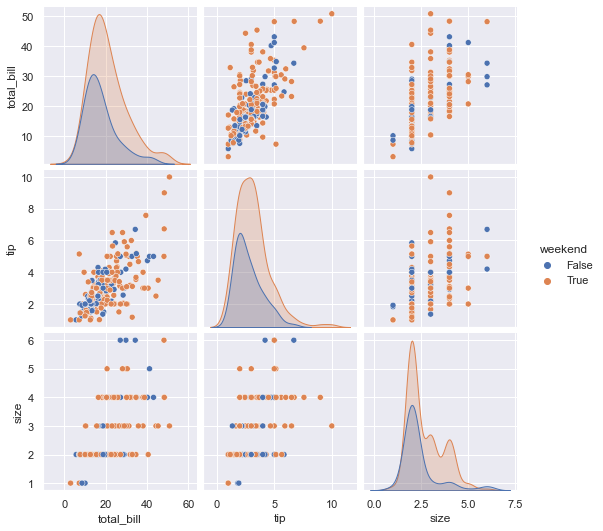

In [87]:
sns.pairplot(tips, hue='weekend');

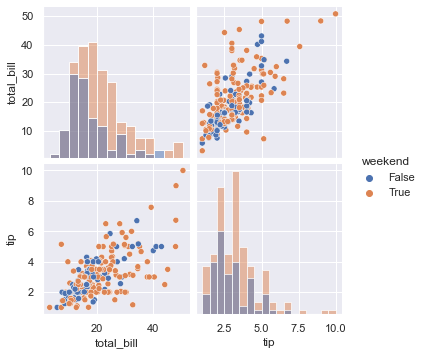

In [90]:
sns.pairplot(tips, hue='weekend', diag_kind='hist', vars=['total_bill', 'tip']);

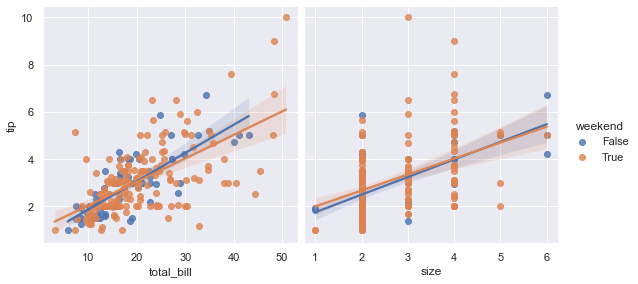

In [91]:
sns.pairplot(tips, hue='weekend', y_vars=['tip'], x_vars=['total_bill', 'size'], kind='reg', height=4);

In [92]:
del tips['weekend']

In [96]:
from ipywidgets import interactive

def size_widget(height=2.5, aspect=1):
    sns.pairplot(tips, height=height, aspect=aspect)

interactive(children=(FloatSlider(value=2.5, description='height', max=3.5, min=1.0, step=0.5), FloatSlider(va…

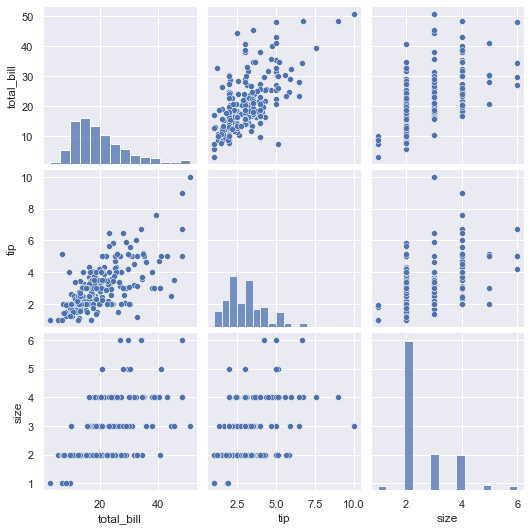

In [97]:
interactive(size_widget, height=(1,3.5,0.5), aspect=(0.5,2,0.25))

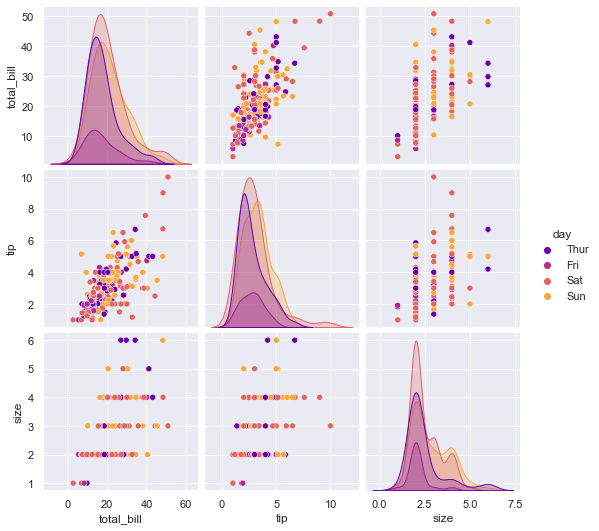

In [98]:
sns.pairplot(tips, hue='day', palette='plasma');

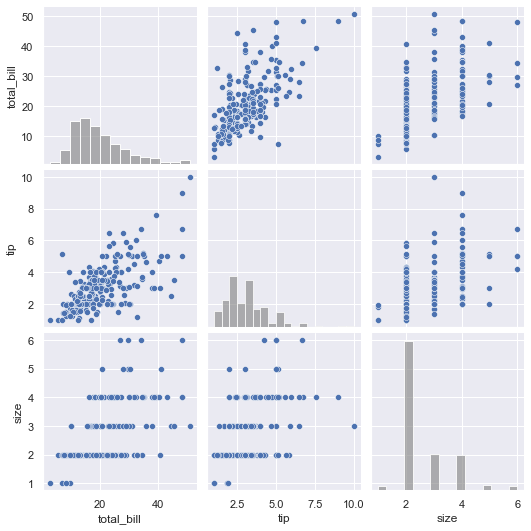

In [99]:
sns.pairplot(tips, diag_kws={'color':'gray', 'alpha':0.6});

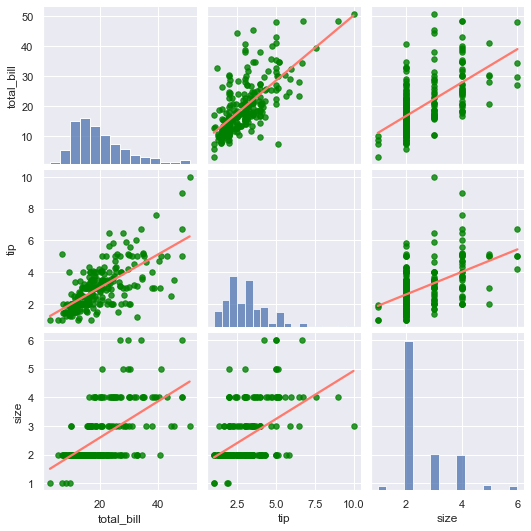

In [105]:
sns.pairplot(tips, kind='reg', plot_kws={'ci':None, 'color':'xkcd:salmon', 'scatter_kws':{'color':'green', 's':30}});